In [1]:
import pandas as pd
import zipfile
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def pluto(mappluto):
    z = zipfile.ZipFile(mappluto)
    z.extractall('../data_initial/')
    
    boroughs = ['Staten_Island', 'Queens', 'Manhattan', 'Bronx', 'Brooklyn']
    abreevs = ['SI', 'QN', 'MN', 'BX', 'BK']

    pluto = []
    i = 0
    for elem in boroughs:
        temp = gpd.read_file('../data_initial/'+elem+'/'+abreevs[i]+'MapPLUTO.shp')
        temp['BBL'] = temp['BBL'].astype(str)
        #temp = temp.to_crs({'init':'epsg:4326'})
        pluto.append(temp)
        i+=1  

    global pluto_updated
    pluto_updated = pd.concat(pluto)

    return pluto_updated.head()

In [3]:
pluto('../data_initial/mappluto_16v2.zip')

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.0,None,437 PURDY AVENUE,R3-1,None,7,15120.0,23400.0,5007470028.0,1488,...,0,1960,None,10314,R3-1,None,None,None,20d,"POLYGON ((944681.4200000018 161477.381400004, ..."
1,0.0,None,CUNARD AVENUE,R3A/HS,None,4,21518.0,21518.0,5006230252.0,0,...,0,0,None,10304,R3A,None,None,None,21d,"POLYGON ((959872.0577999949 162992.5866000056,..."
2,0.0,None,121 MOUNTAINVIEW AVENUE,R3-1,None,7,13561.0,22602.0,5007130017.0,1316,...,0,1920,None,10314,R3-1,None,None,None,21b,"POLYGON ((949278.1987999976 161346.9971999973,..."
3,0.0,None,26 FANNING STREET,R3X,None,7,9720.0,28740.0,5007140091.0,2188,...,0,1975,None,10314,R3X,None,None,None,21b,"POLYGON ((950061.0491999984 160815.3023999929,..."
4,0.0,None,335 SIMONSON AVENUE,R3A,None,7,7617.0,22118.0,5011840039.0,2392,...,0,1965,None,10303,R3A,None,None,None,20c,"POLYGON ((941981.4906000048 168120.2173999995,..."


In [4]:
pluto_updated.to_csv('../data_processed/pluto_16')

### there are no 'ownernames' with 'nyc housing authority' or 'nyc housing' so using ownertype instead

In [5]:
pluto_updated = pd.read_csv('../data_processed/pluto_16')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (27,37,40,46,53,64,65,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pluto_updated = pluto_updated.drop('Unnamed: 0',axis=1)

In [7]:
pluto_updated.head(2)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.0,NaN,437 PURDY AVENUE,R3-1,NaN,7,15120.0,23400.0,5.007470e+09,1488,...,0,1960,NaN,10314,R3-1,NaN,NaN,NaN,20d,"POLYGON ((944681.4200000018 161477.381400004, ..."
1,0.0,NaN,CUNARD AVENUE,R3A/HS,NaN,4,21518.0,21518.0,5.006230e+09,0,...,0,0,NaN,10304,R3A,NaN,NaN,NaN,21d,"POLYGON ((959872.0577999949 162992.5866000056,..."


In [8]:
t1 = pluto_updated[pluto_updated['UnitsRes'] != 0]
#t1 = t1[(t1['OwnerName'] != 'NYC HOUSING AUTHORITY') & (t1['OwnerName'] != 'NYC HOUSING')]

### create categorical variables from building class feature

In [9]:
var = []
i=0
for elem in t1['BldgClass']:
    if elem[i][0] == 'A':
        var.append(1)
    elif elem[i][0] == 'B':
        var.append(2)
    elif elem[i][0] == 'C':
        var.append(3)
    elif elem[i][0] == 'S':
        var.append(3)
    elif elem[i][0] == 'D':
        var.append(4)
    elif elem[i] == 'O8':
        var.append(4)
    elif elem[i][0] == 'L':
        var.append(6)
    elif elem[i][0] == 'R':
        var.append(5)
    else:
        var.append(0)

In [10]:
t1['bldgclass_updated'] = var

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
t1.head(2)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,bldgclass_updated
0,0.0,NaN,437 PURDY AVENUE,R3-1,NaN,7,15120.0,23400.0,5.007470e+09,1488,...,1960,NaN,10314,R3-1,NaN,NaN,NaN,20d,"POLYGON ((944681.4200000018 161477.381400004, ...",2
2,0.0,NaN,121 MOUNTAINVIEW AVENUE,R3-1,NaN,7,13561.0,22602.0,5.007130e+09,1316,...,1920,NaN,10314,R3-1,NaN,NaN,NaN,21b,"POLYGON ((949278.1987999976 161346.9971999973,...",1


In [12]:
len(t1)

759588

In [13]:
t2 = pluto_updated[pluto_updated['ResArea'] != 0]
#t2 = t2[(t2['OwnerType'] != 'O') & (t2['OwnerType'] != 'C')]

In [14]:
len(t2)

758493

### selecting to use 'unitsres' as the value for not equalling zero because there are more rows included

In [15]:
t1.columns

Index([u'APPBBL', u'APPDate', u'Address', u'AllZoning1', u'AllZoning2',
       u'AreaSource', u'AssessLand', u'AssessTot', u'BBL', u'BldgArea',
       u'BldgClass', u'BldgDepth', u'BldgFront', u'Block', u'BoroCode',
       u'Borough', u'BsmtCode', u'BuiltCode', u'BuiltFAR', u'CB2010', u'CD',
       u'CT2010', u'ComArea', u'CommFAR', u'CondoNo', u'Council', u'EDesigNum',
       u'Easements', u'ExemptLand', u'ExemptTot', u'Ext', u'FacilFAR',
       u'FactryArea', u'FireComp', u'GarageArea', u'HealthArea', u'HistDist',
       u'IrrLotCode', u'LandUse', u'Landmark', u'Lot', u'LotArea', u'LotDepth',
       u'LotFront', u'LotType', u'LtdHeight', u'MAPPLUTO_F', u'NumBldgs',
       u'NumFloors', u'OfficeArea', u'OtherArea', u'Overlay1', u'Overlay2',
       u'OwnerName', u'OwnerType', u'PLUTOMapID', u'PolicePrct', u'ProxCode',
       u'ResArea', u'ResidFAR', u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',
       u'SPDist1', u'SPDist2', u'Sanborn', u'SchoolDist', u'SplitZone',
       u'StrgeArea', 

In [16]:
t1['AssessSqft'] = t1['AssessTot'] / t1['BldgArea']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
t1.head(2)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,bldgclass_updated,AssessSqft
0,0.0,NaN,437 PURDY AVENUE,R3-1,NaN,7,15120.0,23400.0,5.007470e+09,1488,...,NaN,10314,R3-1,NaN,NaN,NaN,20d,"POLYGON ((944681.4200000018 161477.381400004, ...",2,15.725806
2,0.0,NaN,121 MOUNTAINVIEW AVENUE,R3-1,NaN,7,13561.0,22602.0,5.007130e+09,1316,...,NaN,10314,R3-1,NaN,NaN,NaN,21b,"POLYGON ((949278.1987999976 161346.9971999973,...",1,17.174772


In [18]:
t1 = t1.drop(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'BldgDepth', 'BldgFront', \
                                   'Block', 'BoroCode', 'Borough', 'CB2010', 'CD', 'CT2010', 'ComArea', \
                                   'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'FacilFAR', 'FactryArea', \
                                   'FireComp', 'GarageArea', 'HealthArea', 'HistDist', 'IrrLotCode', 'Landmark', \
                                   'Lot', 'LotArea', 'LotDepth', 'LotFront', 'LtdHeight', 'MAPPLUTO_F', \
             'OfficeArea', 'OtherArea', 'Overlay1', 'Overlay2', 'PLUTOMapID', 'PolicePrct', 'ResidFAR', \
             'RetailArea', 'Sanborn', 'SchoolDist', 'StrgeArea', 'TaxMap', 'Tract2010', 'YearAlter1', \
             'YearAlter2', 'ZoneDist1', 'ZipCode', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap', \
             'XCoord', 'Version', 'YCoord', 'ZMCode', 'SPDist1', 'SPDist2', 'ExemptTot', 'BuiltCode', \
             'AllZoning1', 'AllZoning2', 'ExemptLand', 'geometry', 'Easements', 'SHAPE_Area', 'SHAPE_Leng', \
             'OwnerName', 'Ext', 'SplitZone', 'BldgClass', 'AssessTot', 'BldgArea', 'UnitsTotal'], axis=1)

In [19]:
t1.columns

Index([u'AssessLand', u'BBL', u'BsmtCode', u'BuiltFAR', u'LandUse', u'LotType',
       u'NumBldgs', u'NumFloors', u'OwnerType', u'ProxCode', u'ResArea',
       u'UnitsRes', u'YearBuilt', u'bldgclass_updated', u'AssessSqft'],
      dtype='object')

### explanation of variables in dataset
* assessland -  tentative assessed land value for Fiscal Year 2017
* assesstot - tentative assessed total value for Fiscal Year 2017
* bldgarea - total gross area in square feet
* bldgclass - code describing the major use of structures on the tax lot
* bsmtcode - code describing the basement type/grade - 0: no basement, 1: full basement above grade, 2: full basement below grade, 3: partial basement above grade, 4: partial basement below grade, 5: unknown
* landuse - code for the tax lot's land use category (01-09)
* lottype - code indicating the location of the tax lot to another tax lot and/or the water (1-9)
* numbldgs - number of buildings in the tax lot
* numfloors - the tallest building on the tax lot, the number of full and partial stories starting from the ground floor
* ownertype - M: mix city and private ownership, P: private ownership, X: mixed (excludes C, M, O, or P ownerships), blank: unknown
* proxcode - physical relationship of the building to neighboring buildings - 0: not available, 1: detatched, 2: semi-attached, 3: attached
* resarea - estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
* unitsres - sum of residential units in all buildings on the tax lot
* unitstotal - sum of residential and non-residential (offices, retail stores, etc.) units in all buildings on the tax lot
* yearbuilt - year structure was built

### merge pluto with complaint data

In [20]:
comp = pd.read_csv('../data_processed/311_heathotwater_2014_2016_BBL_WEEK_AVG.csv')
comp.head()

,BBL,com_count,BBL.1
0,1000047501,0.020408,1000047501
1,1000100032,0.006803,1000100032
2,1000150022,0.006803,1000150022
3,1000160015,0.006803,1000160015
4,1000160020,0.013605,1000160020


In [21]:
comp = comp.drop('BBL.1',axis=1)

In [22]:
print comp['BBL'].dtypes
print t1['BBL'].dtypes

int64
float64


In [23]:
import numpy as np

In [24]:
t1['BBL'] = pd.to_numeric(t1['BBL']).astype(int)

In [25]:
print comp['BBL'].dtypes
print t1['BBL'].dtypes

int64
int64


In [26]:
features = pd.merge(t1, comp, on ='BBL')

In [27]:
print len(t1)
print len(comp)
print len(features)

759588
53310
51782


In [28]:
features.head()

,AssessLand,BBL,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,OwnerType,ProxCode,ResArea,UnitsRes,YearBuilt,bldgclass_updated,AssessSqft,com_count
0,8441.0,5010310021,2.0,0.70,2.0,5.0,1,2.75,NaN,1.0,4710,3,1920,3,4.695966,0.013605
1,6480.0,5012460037,2.0,0.92,1.0,5.0,1,2.00,NaN,1.0,2700,2,2003,2,8.933333,0.034014
2,9007.0,5033390088,2.0,0.48,1.0,5.0,1,2.00,NaN,1.0,1976,2,1955,2,15.320344,0.054422
3,3980.0,5000810024,2.0,0.54,1.0,5.0,1,2.00,NaN,1.0,1344,1,1901,1,8.440476,0.074830
4,96750.0,5000440001,5.0,0.66,2.0,3.0,1,2.00,P,0.0,14156,16,1984,3,22.951399,0.006803


### check to see if original pluto dataframe has the same features as merged dataframe

In [29]:
t1[t1['BBL'] == 5010310021]

,AssessLand,BBL,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,OwnerType,ProxCode,ResArea,UnitsRes,YearBuilt,bldgclass_updated,AssessSqft
87,8441.0,5010310021,2.0,0.7,2.0,5.0,1,2.75,NaN,1.0,4710,3,1920,3,4.695966


In [30]:
features.to_csv('../data_processed/mappluto_16_features')

### select features with ensemble decision tree and random forest classifiers

In [31]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
import random
random.seed(123)

In [33]:
le = preprocessing.LabelEncoder()

In [34]:
le.fit([elem for elem in features['OwnerType'].unique()])
features['ownertype_updated'] = le.transform([elem for elem in features['OwnerType']])

In [35]:
features = features.drop('OwnerType',axis=1)

In [36]:
features.isnull().sum()

AssessLand           0
BBL                  0
BsmtCode             0
BuiltFAR             0
LandUse              0
LotType              0
NumBldgs             0
NumFloors            0
ProxCode             0
ResArea              0
UnitsRes             0
YearBuilt            0
bldgclass_updated    0
AssessSqft           3
com_count            0
ownertype_updated    0
dtype: int64

In [37]:
features = features.dropna()

In [38]:
features = features.apply(pd.to_numeric)
features = features.astype(int)

In [39]:
features.head()

,AssessLand,BBL,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,ProxCode,ResArea,UnitsRes,YearBuilt,bldgclass_updated,AssessSqft,com_count,ownertype_updated
0,8441,5010310021,2,0,2,5,1,2,1,4710,3,1920,3,4,0,5
1,6480,5012460037,2,0,1,5,1,2,1,2700,2,2003,2,8,0,5
2,9007,5033390088,2,0,1,5,1,2,1,1976,2,1955,2,15,0,5
3,3980,5000810024,2,0,1,5,1,2,1,1344,1,1901,1,8,0,5
4,96750,5000440001,5,0,2,3,1,2,0,14156,16,1984,3,22,0,3


In [40]:
features.to_csv('../data_processed/mappluto_16_features_categorical')

In [41]:
x = features.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,13,15]]
y = features.iloc[:,14]

In [42]:
x.head(2)

,AssessLand,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,ProxCode,ResArea,UnitsRes,YearBuilt,AssessSqft,ownertype_updated
0,8441,2,0,2,5,1,2,1,4710,3,1920,4,5
1,6480,2,0,1,5,1,2,1,2700,2,2003,8,5


In [43]:
y.head(2)

0    0
1    0
Name: com_count, dtype: int64

In [44]:
model = ExtraTreesClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.16579516  0.02143697  0.07397675  0.02694875  0.01668861  0.01438316
  0.04555646  0.00948353  0.18293217  0.15315496  0.1307815   0.14745473
  0.01140723]


In [45]:
etc = pd.DataFrame()
etc['feature_name'] = x.columns
etc['etc_value'] = model.feature_importances_

In [46]:
etc = etc.sort_values('etc_value',ascending=False)
etc

,feature_name,etc_value
8,ResArea,0.182932
0,AssessLand,0.165795
9,UnitsRes,0.153155
11,AssessSqft,0.147455
10,YearBuilt,0.130782
2,BuiltFAR,0.073977
6,NumFloors,0.045556
3,LandUse,0.026949
1,BsmtCode,0.021437
4,LotType,0.016689


In [47]:
model = ExtraTreesRegressor()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.20377021  0.01408104  0.05406205  0.02912958  0.0126609   0.02107833
  0.02483232  0.01181731  0.15416106  0.15372237  0.11745947  0.17594129
  0.02728407]


In [48]:
etr = pd.DataFrame()
etr['feature_name'] = x.columns
etr['etr_value'] = model.feature_importances_

In [49]:
etr = etr.sort_values('etr_value',ascending=False)
etr

,feature_name,etr_value
0,AssessLand,0.203770
11,AssessSqft,0.175941
8,ResArea,0.154161
9,UnitsRes,0.153722
10,YearBuilt,0.117459
2,BuiltFAR,0.054062
3,LandUse,0.029130
12,ownertype_updated,0.027284
6,NumFloors,0.024832
5,NumBldgs,0.021078


In [50]:
model = RandomForestClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.18218634  0.02568957  0.04974996  0.02573224  0.03041843  0.0117765
  0.03297621  0.02235934  0.22120558  0.13426654  0.11636397  0.12210613
  0.02516918]


In [51]:
rfc = pd.DataFrame()
rfc['feature_name'] = x.columns
rfc['rfc_value'] = model.feature_importances_

In [52]:
rfc = rfc.sort_values('rfc_value',ascending=False)
rfc

,feature_name,rfc_value
8,ResArea,0.221206
0,AssessLand,0.182186
9,UnitsRes,0.134267
11,AssessSqft,0.122106
10,YearBuilt,0.116364
2,BuiltFAR,0.049750
6,NumFloors,0.032976
4,LotType,0.030418
3,LandUse,0.025732
1,BsmtCode,0.025690


In [53]:
model = RandomForestRegressor()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.20276057  0.04383504  0.0313354   0.05101948  0.01968096  0.00379301
  0.01260815  0.03489879  0.19821222  0.13076383  0.10852796  0.14626868
  0.01629592]


In [54]:
rfr = pd.DataFrame()
rfr['feature_name'] = x.columns
rfr['rfr_value'] = model.feature_importances_

In [55]:
rfr = rfr.sort_values('rfr_value',ascending=False)
rfr

,feature_name,rfr_value
0,AssessLand,0.202761
8,ResArea,0.198212
11,AssessSqft,0.146269
9,UnitsRes,0.130764
10,YearBuilt,0.108528
3,LandUse,0.051019
1,BsmtCode,0.043835
7,ProxCode,0.034899
2,BuiltFAR,0.031335
4,LotType,0.019681


In [56]:
merged = pd.merge(etc, rfc, on='feature_name')

In [57]:
merged = pd.merge(merged, rfr, on='feature_name')

In [58]:
merged = pd.merge(merged, etr, on ='feature_name')

In [59]:
merged['avg'] = merged.mean(axis=1)

In [60]:
merged = merged.sort_values('avg', ascending=False)

In [61]:
merged

,feature_name,etc_value,rfc_value,rfr_value,etr_value,avg
0,ResArea,0.182932,0.221206,0.198212,0.154161,0.189128
1,AssessLand,0.165795,0.182186,0.202761,0.203770,0.188628
3,AssessSqft,0.147455,0.122106,0.146269,0.175941,0.147943
2,UnitsRes,0.153155,0.134267,0.130764,0.153722,0.142977
4,YearBuilt,0.130782,0.116364,0.108528,0.117459,0.118283
5,BuiltFAR,0.073977,0.049750,0.031335,0.054062,0.052281
7,LandUse,0.026949,0.025732,0.051019,0.029130,0.033208
6,NumFloors,0.045556,0.032976,0.012608,0.024832,0.028993
8,BsmtCode,0.021437,0.025690,0.043835,0.014081,0.026261
11,ownertype_updated,0.011407,0.025169,0.016296,0.027284,0.020039


In [62]:
features['com_count'].unique()

array([ 0,  1,  7,  3, 17,  2,  5, 30, 20,  9,  4,  6, 12, 10,  8])

In [63]:
test = pd.read_csv('../data_processed/mappluto_16_features_categorical')

In [64]:
test.head(2)

,Unnamed: 0,AssessLand,BBL,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,ProxCode,ResArea,UnitsRes,YearBuilt,bldgclass_updated,AssessSqft,com_count,ownertype_updated
0,0,8441,5010310021,2,0,2,5,1,2,1,4710,3,1920,3,4,0,5
1,1,6480,5012460037,2,0,1,5,1,2,1,2700,2,2003,2,8,0,5


### ridge, lasso, linear model feature significance

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [66]:
x.head(2)

,AssessLand,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,ProxCode,ResArea,UnitsRes,YearBuilt,AssessSqft,ownertype_updated
0,8441,2,0,2,5,1,2,1,4710,3,1920,4,5
1,6480,2,0,1,5,1,2,1,2700,2,2003,8,5


In [67]:
y.head(2)

0    0
1    0
Name: com_count, dtype: int64

In [78]:
OS_linear=[]
OS_ridge=[]
OS_lasso=[]
linear_coefs = []
ri_coefs = []
ls_coefs = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(x,
                            y, test_size = 0.3, random_state =i)
    lm=linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    linear_coefs.append(lm.coef_)
    OS_linear.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var())
    
    ri=linear_model.Ridge(alpha=10E+5)
    ri.fit(X_train,y_train)
    ri_coefs.append(ri.coef_)
    OS_ridge.append(1-((ri.predict(X_test)-y_test)**2).mean()/y_test.var())
    
    ls = linear_model.Lasso()
    ls.fit(X_train,y_train)
    ls_coefs.append(ls.coef_)
    OS_lasso.append(1-((ls.predict(X_test)-y_test)**2).mean()/y_test.var())
    
print np.mean(OS_linear)
print np.mean(OS_ridge)
print np.mean(OS_lasso)
variables = pd.DataFrame()
variables['var_names'] = [elem for elem in x.columns]
variables['linear'] = [elem for elem in np.mean(linear_coefs, axis=0)]
variables['ridge'] = [elem for elem in np.mean(ri_coefs, axis=0)]
variables['lasso'] = [elem for elem in np.mean(ls_coefs, axis=0)]

-0.00401690318169
-0.018397206697
-0.000458414050682


### q for bo: should i remove the duplicative features and re-run the model? use assesssqft not assessland and use either unitsres or resarea?

In [79]:
variables

,var_names,linear,ridge,lasso
0,AssessLand,-9.436725e-09,-1.444642e-08,-9.732009e-09
1,BsmtCode,3.686186e-07,1.222519e-04,0.000000e+00
2,BuiltFAR,8.079497e-07,4.280871e-05,0.000000e+00
3,LandUse,4.829061e-07,5.958581e-05,0.000000e+00
4,LotType,-7.237246e-08,-9.705897e-05,0.000000e+00
5,NumBldgs,1.836778e-06,-2.431250e-05,0.000000e+00
6,NumFloors,3.601854e-07,2.217800e-04,0.000000e+00
7,ProxCode,-2.277639e-07,-1.223378e-04,0.000000e+00
8,ResArea,1.227576e-07,-6.576555e-07,8.012880e-08
9,UnitsRes,1.684636e-04,1.006575e-03,2.157827e-04


### random forest regressor

#### tuning forest parameters
* max_features - the maximum number of features considered in an individual tree (auto/none)
* n_estimators - # of trees (try different ones)
* min_sample_leaf -  leaf is the end node of a decision tree and a smaller leaf makes the model more prone to capturing noise in train data (try different ones)
* n_jobs - tells algorithm how many processors it can use
* oob_score - this is a random forest cross validation method, which tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself (TRUE)

In [80]:
print type(x)
print type(y)
print len(x)
print len(y)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
51779
51779


In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#X_train_1, X_vali, y_train_1, y_vali = train_test_split(X_train, y_train, test_size=0.3)

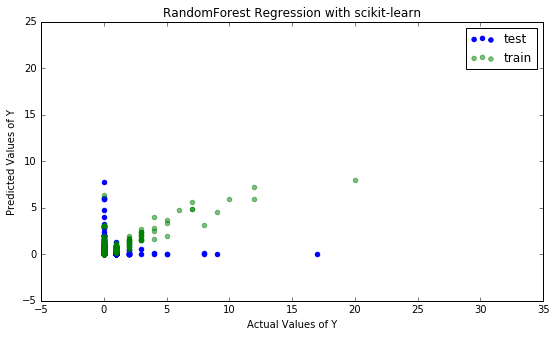

In [82]:
#http://blog.yhat.com/posts/comparing-random-forests-in-python-and-r.html
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_test = rfr.predict(X_test)
pred_train = rfr.predict(X_train)
plt.figure(figsize(9,5))
plt.scatter(y_test, pred_test, color='blue', label='test')
plt.scatter(y_train, pred_train, color='green', label='train', alpha=.5)
plt.xlabel('Actual Values of Y')
plt.ylabel('Predicted Values of Y')
plt.title("RandomForest Regression with scikit-learn")
plt.legend()
plt.show()

In [83]:
rfr_df = pd.DataFrame()
rfr_df['real_test'] = y_test
rfr_df['predicted_test'] = pred_test
rfr_df['error_test'] = (rfr_df['real_test'] - rfr_df['predicted_test'])**2

In [84]:
print 'mse of test: ' + str(sum(rfr_df['error_test'])/len(rfr_df))
print 'mse of train: ' + str(sum(((y_train-pred_train)**2)/len(pred_train)))

mse of test: 0.0711110551251
mse of train: 0.0175644119952


In [85]:
print len(pred_test)
print len(y_test)
print len(y_train)
print len(pred_train)

15534
15534
36245
36245


In [86]:
correct = 0
array_act = np.array(y_test)
array_pred = np.array(pred_test)
for i in range(0,len(pred_test)):
    if array_act[i] == array_pred[i]:
        correct+=1
print(correct/float(len(pred_test))*100)

93.4337582078
